In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('/Users/keenanfryer/projects/thesis-plotting/src')

In [17]:
from plot_cartopy import PlotCartopy
from ensemble_datasets import Dataset
from plotmap import PlotMap
import numpy

In [3]:
yes_fn_glob = '/Volumes/Seagate/thesis_project/thesis_project_data/grib_output_files/YesradRun/wrfout_20130209T000000_*.grib2'

In [ ]:
yes_ds = Dataset(yes_fn_glob,ensemble_data=True)

In [48]:
yes_ds_mem0001_all_times = Dataset('/Volumes/Seagate/thesis_project/thesis_project_data/grib_output_files/YesradRun/wrfout_20130209T*_0001.grib2',ensemble_data=True)

In [7]:
yes_ds_mem0001_all_times.isobaric_data

<xarray.Dataset>
Dimensions:                  (time: 25, projection_y_coordinate: 183,
                              projection_x_coordinate: 189, pressure: 46,
                              member: 1)
Coordinates:
  * time                     (time) datetime64[ns] 2013-02-09 ... 2013-02-09T...
  * projection_y_coordinate  (projection_y_coordinate) float64 9.489e+05 ... ...
  * projection_x_coordinate  (projection_x_coordinate) float64 3.211e+05 ... ...
    forecast_reference_time  datetime64[ns] 2013-02-09
  * pressure                 (pressure) float64 2.0 5.0 7.0 ... 975.0 1e+03
  * member                   (member) int64 1
    forecast_period          (time) timedelta64[ns] 00:00:00 ... 06:00:00
    latitude                 (member, time, projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(1, 1, 183, 189), meta=np.ndarray>
    longitude                (member, time, projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(1, 1, 183, 189), meta=np.ndarray>
Data variables:
    temperature              (pressure, member, time, projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(1, 1, 1, 183, 189), meta=np.ndarray>
    height                   (pressure, member, time, projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(1, 1, 1, 183, 189), meta=np.ndarray>
    uwind                    (pressure, member, time, projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(1, 1, 1, 183, 189), meta=np.ndarray>
    vwind                    (pressure, member, time, projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(1, 1, 1, 183, 189), meta=np.ndarray>

In [16]:
import metpy.calc as mcalc
from metpy.units import units

In [24]:
ds_700hPa = yes_ds_mem0001_all_times.isobaric_data.isel(time=0,member=0).sel(pressure=700)
pot_temp = mcalc.potential_temperature(numpy.ones_like(ds_700hPa['temperature'])*700*units('hPa'),ds_700hPa['temperature']*units('K'))

In [69]:
yes_ds_mem0001_all_times.surface_data['temperature']


<xarray.DataArray 'temperature' (member: 1, time: 25,
                                 projection_y_coordinate: 183,
                                 projection_x_coordinate: 189)>
dask.array<broadcast_to, shape=(1, 25, 183, 189), dtype=float64, chunksize=(1, 1, 183, 189), chunktype=numpy.ndarray>
Coordinates:
  * time                     (time) datetime64[ns] 2013-02-09 ... 2013-02-09T...
  * projection_y_coordinate  (projection_y_coordinate) float64 9.489e+05 ... ...
  * projection_x_coordinate  (projection_x_coordinate) float64 3.211e+05 ... ...
  * member                   (member) int64 1
    forecast_reference_time  datetime64[ns] 2013-02-09
    latitude                 (member, time, projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(1, 1, 183, 189), meta=np.ndarray>
    longitude                (member, time, projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(1, 1, 183, 189), meta=np.ndarray>
Attributes:
    long_name:   air_temperature_surface
    units:       K
    GRIB_PARAM:  GRIB2:d000c000n000
    grib2_meta:  {'discipline': 0, 'category': 0, 'number': 0, 'product_defin...
    crs:         +proj=lcc +a=6371229.0 +b=6371229.0 +lon_0=280.0 +lat_0=30.0...
    member:      0001

In [28]:
ds_700hPa['temperature'].values

array([[263.4, 263.4, 263.2, ..., 274. , 274.1, 274.3],
       [263.3, 263.6, 263.7, ..., 274.1, 274.1, 274.3],
       [263.2, 263.5, 263.6, ..., 274.2, 274.1, 274.2],
       ...,
       [259.9, 259.9, 259.8, ..., 266.5, 266.6, 266.7],
       [259.8, 259.8, 259.7, ..., 266.6, 266.6, 266.7],
       [259.7, 259.7, 259.7, ..., 266.6, 266.6, 266.7]])

In [30]:
pot_temp.values

/Users/keenanfryer/miniconda3/envs/xr_iris_grib/lib/python3.9/site-packages/xarray/core/variable.py:314: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  data = np.asarray(data)


array([[291.65771802, 291.65771802, 291.4362619 , ..., 303.3948927 ,
        303.50562077, 303.72707689],
       [291.54698996, 291.87917415, 291.98990221, ..., 303.50562077,
        303.50562077, 303.72707689],
       [291.4362619 , 291.76844608, 291.87917415, ..., 303.61634883,
        303.50562077, 303.61634883],
       ...,
       [287.78223582, 287.78223582, 287.67150775, ..., 295.09028798,
        295.20101604, 295.3117441 ],
       [287.67150775, 287.67150775, 287.56077969, ..., 295.20101604,
        295.20101604, 295.3117441 ],
       [287.56077969, 287.56077969, 287.56077969, ..., 295.20101604,
        295.20101604, 295.3117441 ]])

In [ ]:
plotcart = PlotCartopy()

In [23]:
numpy.ones_like(ds_700hPa['temperature'])

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [ ]:
plotmap = PlotMap()

In [ ]:
plotmap.plot_map()

In [34]:
timeone = yes_ds_mem0001_all_times.valid_time[0]

In [37]:
yes_ds_mem0001_all_times.surface_data.get('temperature').sel({})

<xarray.DataArray 'temperature' (member: 1, time: 25,
                                 projection_y_coordinate: 183,
                                 projection_x_coordinate: 189)>
dask.array<broadcast_to, shape=(1, 25, 183, 189), dtype=float64, chunksize=(1, 1, 183, 189), chunktype=numpy.ndarray>
Coordinates:
  * time                     (time) datetime64[ns] 2013-02-09 ... 2013-02-09T...
  * projection_y_coordinate  (projection_y_coordinate) float64 9.489e+05 ... ...
  * projection_x_coordinate  (projection_x_coordinate) float64 3.211e+05 ... ...
  * member                   (member) int64 1
    forecast_reference_time  datetime64[ns] 2013-02-09
    latitude                 (member, time, projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(1, 1, 183, 189), meta=np.ndarray>
    longitude                (member, time, projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(1, 1, 183, 189), meta=np.ndarray>
Attributes:
    long_name:   air_temperature_surface
    units:       K
    GRIB_PARAM:  GRIB2:d000c000n000
    grib2_meta:  {'discipline': 0, 'category': 0, 'number': 0, 'product_defin...
    crs:         +proj=lcc +a=6371229.0 +b=6371229.0 +lon_0=280.0 +lat_0=30.0...
    member:      0001

In [60]:
yes_ds_mem0001_all_times.surface_data.get('temperature').isel({'time':0,'member':0})

<xarray.DataArray 'temperature' (projection_y_coordinate: 183,
                                 projection_x_coordinate: 189)>
dask.array<getitem, shape=(183, 189), dtype=float64, chunksize=(183, 189), chunktype=numpy.ndarray>
Coordinates:
    time                     datetime64[ns] 2013-02-09
  * projection_y_coordinate  (projection_y_coordinate) float64 9.489e+05 ... ...
  * projection_x_coordinate  (projection_x_coordinate) float64 3.211e+05 ... ...
    member                   int64 1
    forecast_reference_time  datetime64[ns] 2013-02-09
    latitude                 (projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(183, 189), meta=np.ndarray>
    longitude                (projection_y_coordinate, projection_x_coordinate) float64 dask.array<chunksize=(183, 189), meta=np.ndarray>
Attributes:
    long_name:   air_temperature_surface
    units:       K
    GRIB_PARAM:  GRIB2:d000c000n000
    grib2_meta:  {'discipline': 0, 'category': 0, 'number': 0, 'product_defin...
    crs:         +proj=lcc +a=6371229.0 +b=6371229.0 +lon_0=280.0 +lat_0=30.0...
    member:      0001

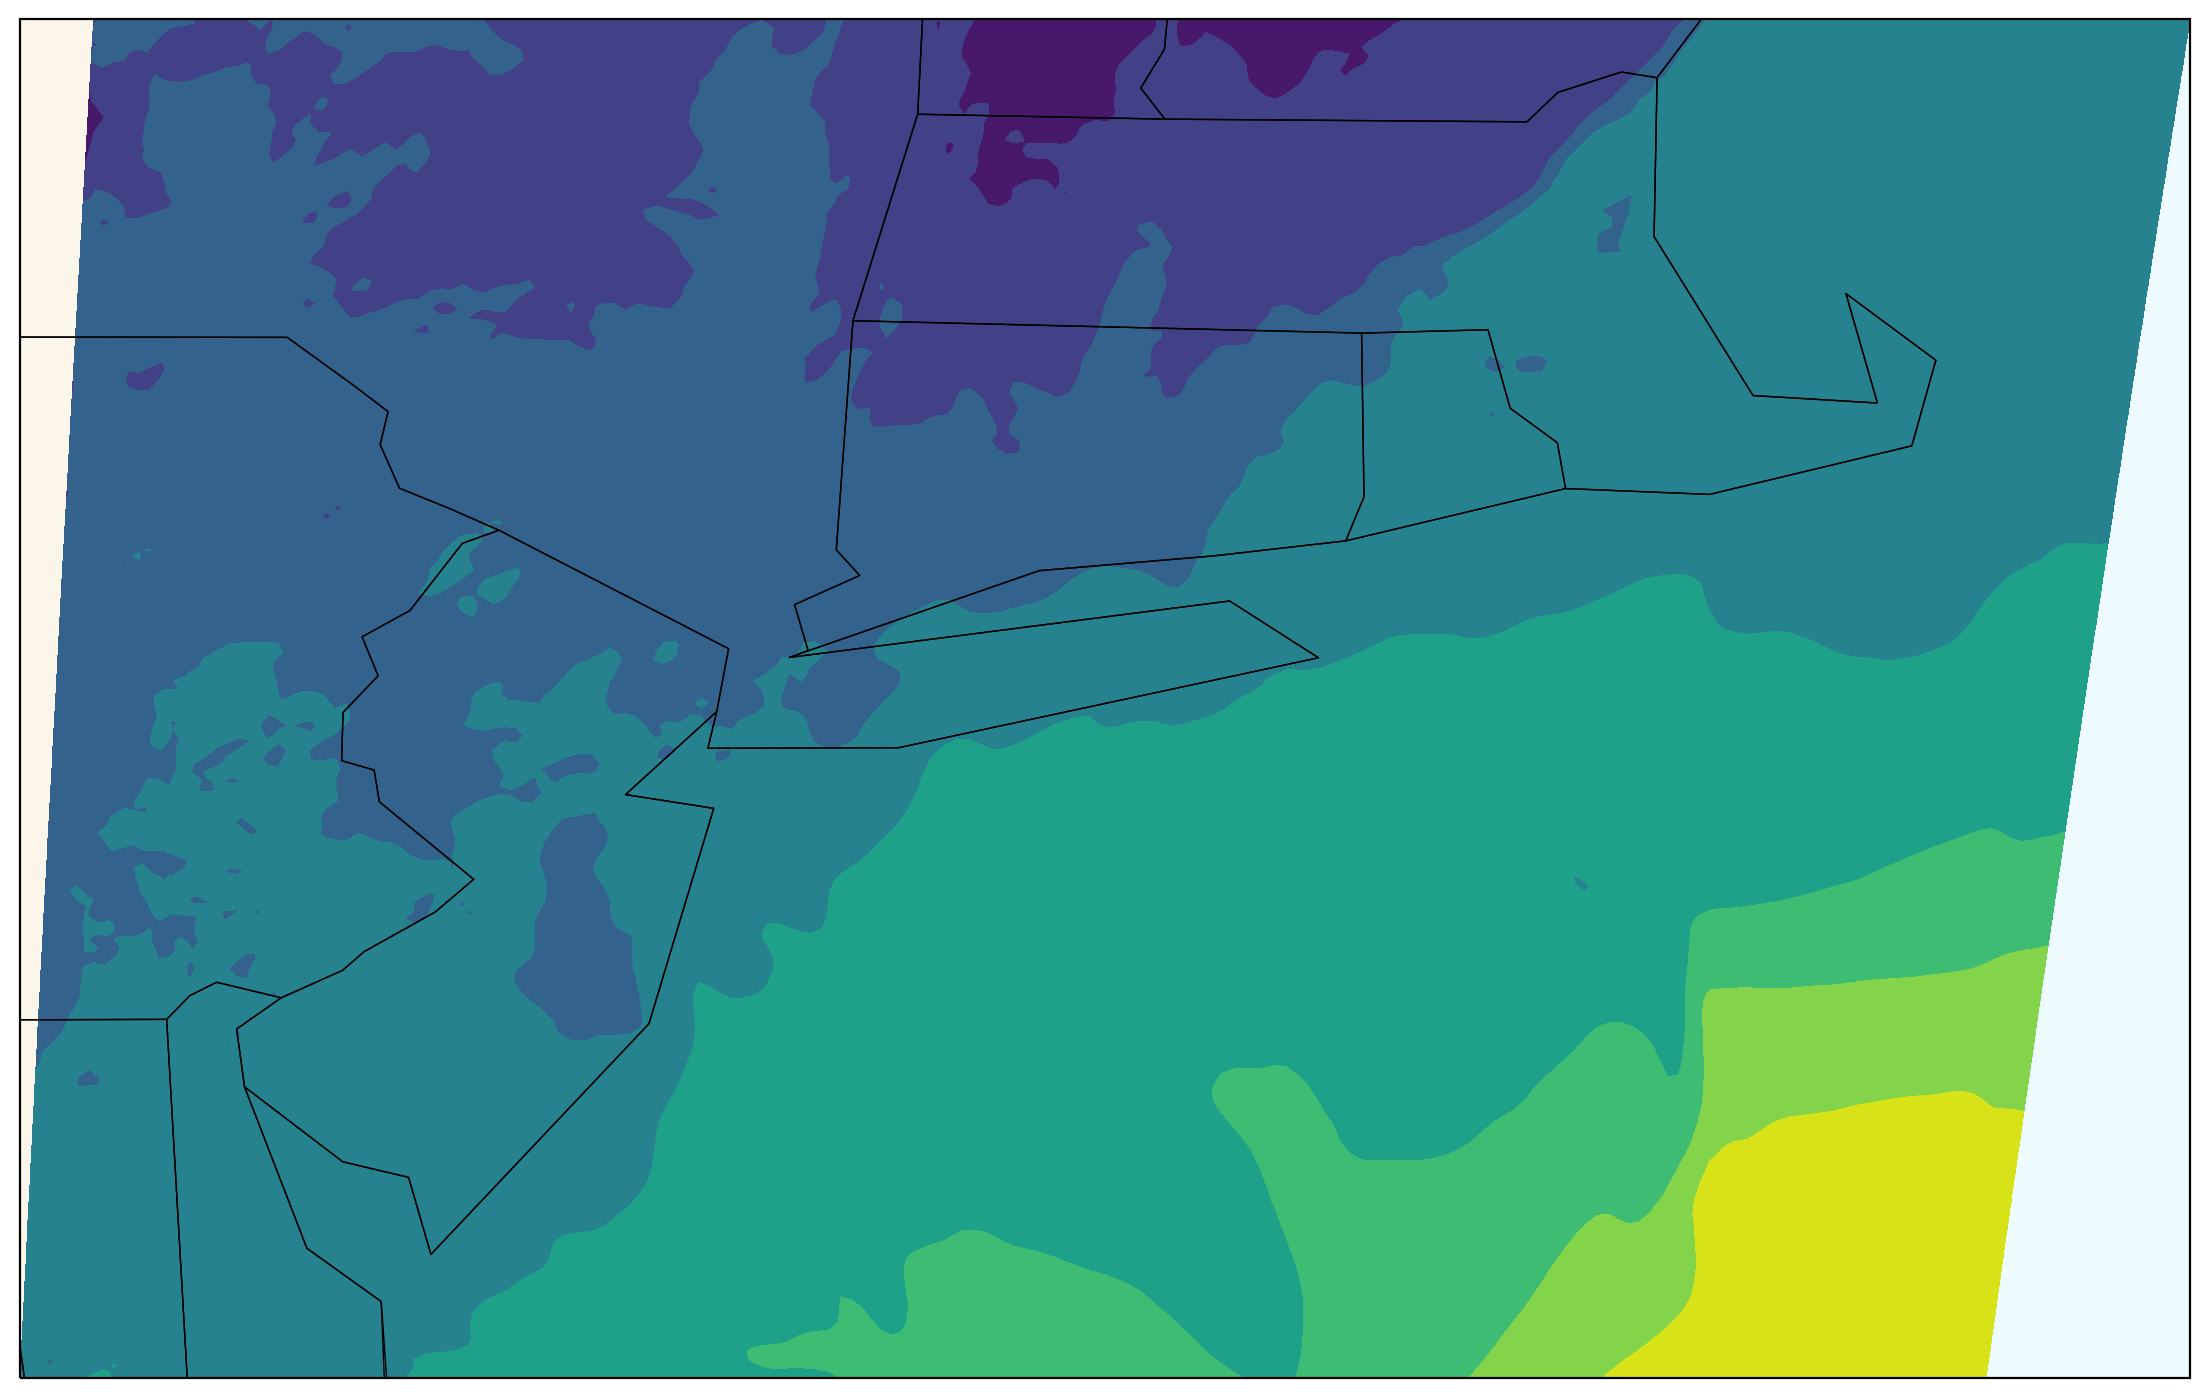

In [66]:
yes_ds_mem0001_all_times.plot_surface_field('temperature',{'time':timeone,'member':1})



In [ ]:
PlotMap.__dict__

In [ ]:
"""
plot MSLP, 2m Temp, and 10 m winds
    decide if ensemble mean, pmm, or indv. members (20-40 plots
plot 700/850 fgen (ens mean)
    need to calc these
plot surface refl
    not sure if avail
plot max refl
    likely already done (check locally)
    decide if ensemble mean, pmm, or indv. members (20-40 plots)
plot xsec of fgen and theta-e
    decide if ensemble mean, pmm, or indv. members (20-40 plots)
plot xsec with moisture & in-plane wind
    done? May need to revive script though


TODO:

DO all the above for yesras, norad, yesrad_refl_only,
    and yesrad_velocity_only. All should have grib files on disc.
    CHECK FOR ALL DATA ON DISC

Write up general conclusions from plots alone. Then
    forward those general conclusios and work from there.


"""